# German Credit Card

In [1]:
import os
import numpy as np
#np.random.seed(1032)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns",18)

In [2]:
os.getcwd()

'C:\\Users\\bkolh\\OneDrive\\Desktop\\Priyanka\\2. Stats & ML\\July -23\\Lecture notes\\20-July-23 - Decision Tree\\21st July 2023'

In [3]:
credit_dt = pd.read_csv('German Credit Dataset.csv')

In [4]:
credit_dt.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


* DM - Deutsche Mark(currency of West Germany)
* By analyzing this dataset we should be able to know if the person is a credit defaulter or not. The "default" is a dependent variable and others are independet variables

In [5]:
credit_dt.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [6]:
credit_dt.shape

(1000, 17)

In [7]:
credit_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [8]:
# !pip install dtale

In [9]:
# import dtale
# import dtale.app as dtale_app

In [10]:
#dtale.show(credit_dt)

### Data Cleaning

In [11]:
credit_df = credit_dt.copy()

In [12]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


> **Working on features checking_balance, savings_balance and employment_duration**

In [13]:
credit_df['checking_balance']. value_counts().index

Index(['unknown', '< 0 DM', '1 - 200 DM', '> 200 DM'], dtype='object')

In [14]:
data_correction = ['checking_balance','savings_balance','employment_duration']
def count_size():
    dict = {}
    for i in data_correction:
        x = credit_df[i].value_counts().index.size
        dict.update({i:x})
    return(dict)

#x = count_size()
#print(x, type(x))

for i in data_correction:
    x = count_size()
    if x[i]==4:
        credit_df[i]=np.where(credit_df[i]== credit_df[i].value_counts().index[0], 0, 
                          np.where(credit_df[i]== credit_df[i].value_counts().index[1], 1, 
                          np.where(credit_df[i]== credit_df[i].value_counts().index[2],2,3)) )
    elif x[i]==5:
        credit_df[i]=np.where(credit_df[i]== credit_df[i].value_counts().index[0], 0, 
                          np.where(credit_df[i]== credit_df[i].value_counts().index[1], 1, 
                          np.where(credit_df[i]== credit_df[i].value_counts().index[2],2,
                        np.where(credit_df[i]== credit_df[i].value_counts().index[3],3,4))) )
          

In [15]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,critical,furniture/appliances,1169,1,1,4,4,67,none,own,2,skilled,1,yes,no
1,2,48,good,furniture/appliances,5951,0,0,2,2,22,none,own,1,skilled,1,no,yes
2,0,12,critical,education,2096,0,2,2,3,49,none,own,1,unskilled,2,no,no
3,1,42,good,furniture/appliances,7882,0,2,2,4,45,none,other,1,skilled,2,no,no
4,1,24,poor,car,4870,0,0,3,4,53,none,other,2,skilled,2,no,yes


In [16]:
for i in data_correction:
    print("*******Original********\n")
    print('-----', i,'-----', '\n', credit_dt[i].value_counts(),'\n')
    print("*******Corrected********\n")
    print('-----', i,'-----', '\n',credit_df[i].value_counts(),'\n')
    

*******Original********

----- checking_balance ----- 
 unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64 

*******Corrected********

----- checking_balance ----- 
 0    394
1    274
2    269
3     63
Name: checking_balance, dtype: int64 

*******Original********

----- savings_balance ----- 
 < 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64 

*******Corrected********

----- savings_balance ----- 
 0    603
1    183
2    103
3     63
4     48
Name: savings_balance, dtype: int64 

*******Original********

----- employment_duration ----- 
 1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64 

*******Corrected********

----- employment_duration ----- 
 0    339
1    253
2    174
3    172
4     62
Name: employment_duration, dtype: int64 



Looking at above data we can conclude that the data replacement is correctly done


> **Working on feature "purpose"** 

* "furniture/appliances" will be replaced with "appliances"

In [17]:
credit_df['purpose'].value_counts()

furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64

In [18]:
credit_df['purpose'] = np.where(credit_df['purpose']=='furniture/appliances','appliances',credit_df['purpose'])

In [19]:
credit_df['purpose'].value_counts()
# Changes are reflecting.

appliances     473
car            337
business        97
education       59
renovations     22
car0            12
Name: purpose, dtype: int64

In [20]:
print(list(credit_dt.select_dtypes(include = 'object')))
print(len(list(credit_dt.select_dtypes(include = 'object'))))

['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration', 'other_credit', 'housing', 'job', 'phone', 'default']
10


In [21]:
print(list(credit_df.select_dtypes(include = 'object')))
print(len(list(credit_df.select_dtypes(include = 'object'))))

['credit_history', 'purpose', 'other_credit', 'housing', 'job', 'phone', 'default']
7


In [22]:
# before changes
credit_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [23]:
# #after changes
# credit_df.info()

> After the above changes in data actual numeric variables got converted into numeric from object such as variables 'checking_balance', 'savings_balance' and 'employment_duration' 

In [24]:
# credit_df.head()

### Checking Missing values

In [25]:
credit_df.isna().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

> ***No missing values are present.***

### Checking Duplicates

In [26]:
credit_df.duplicated().sum()

0

In [27]:
credit_df[credit_df.duplicated()]

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default


> ***There are no duplicate values.***

### Unique Variables

In [28]:
dict={}
for i in credit_df.columns:
        x = len(credit_df[i].unique())
        dict[i]=x
        #print(f'{i}:\n{x}\n\n')
cnt = pd.DataFrame(dict.items(), columns = ['features','unique_count']).sort_values(by ='unique_count', ignore_index = True) 
cnt

,features,unique_count
0,default,2
1,dependents,2
2,phone,2
3,housing,3
4,other_credit,3
5,job,4
6,existing_loans_count,4
7,checking_balance,4
8,percent_of_income,4
9,years_at_residence,4


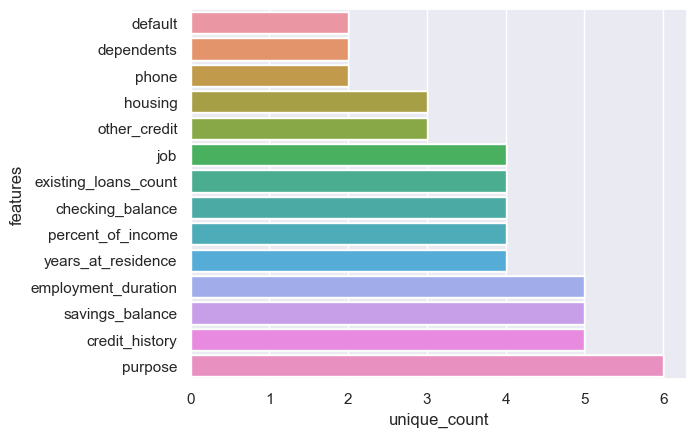

In [29]:
for i in credit_df.columns:

    if i not in ['months_loan_duration','age','amount']:
        sns.barplot(y= cnt['features'][:14], x = cnt['unique_count'][:14])
        #plt.xticks(rotation = 90)        

### Checking Outliers

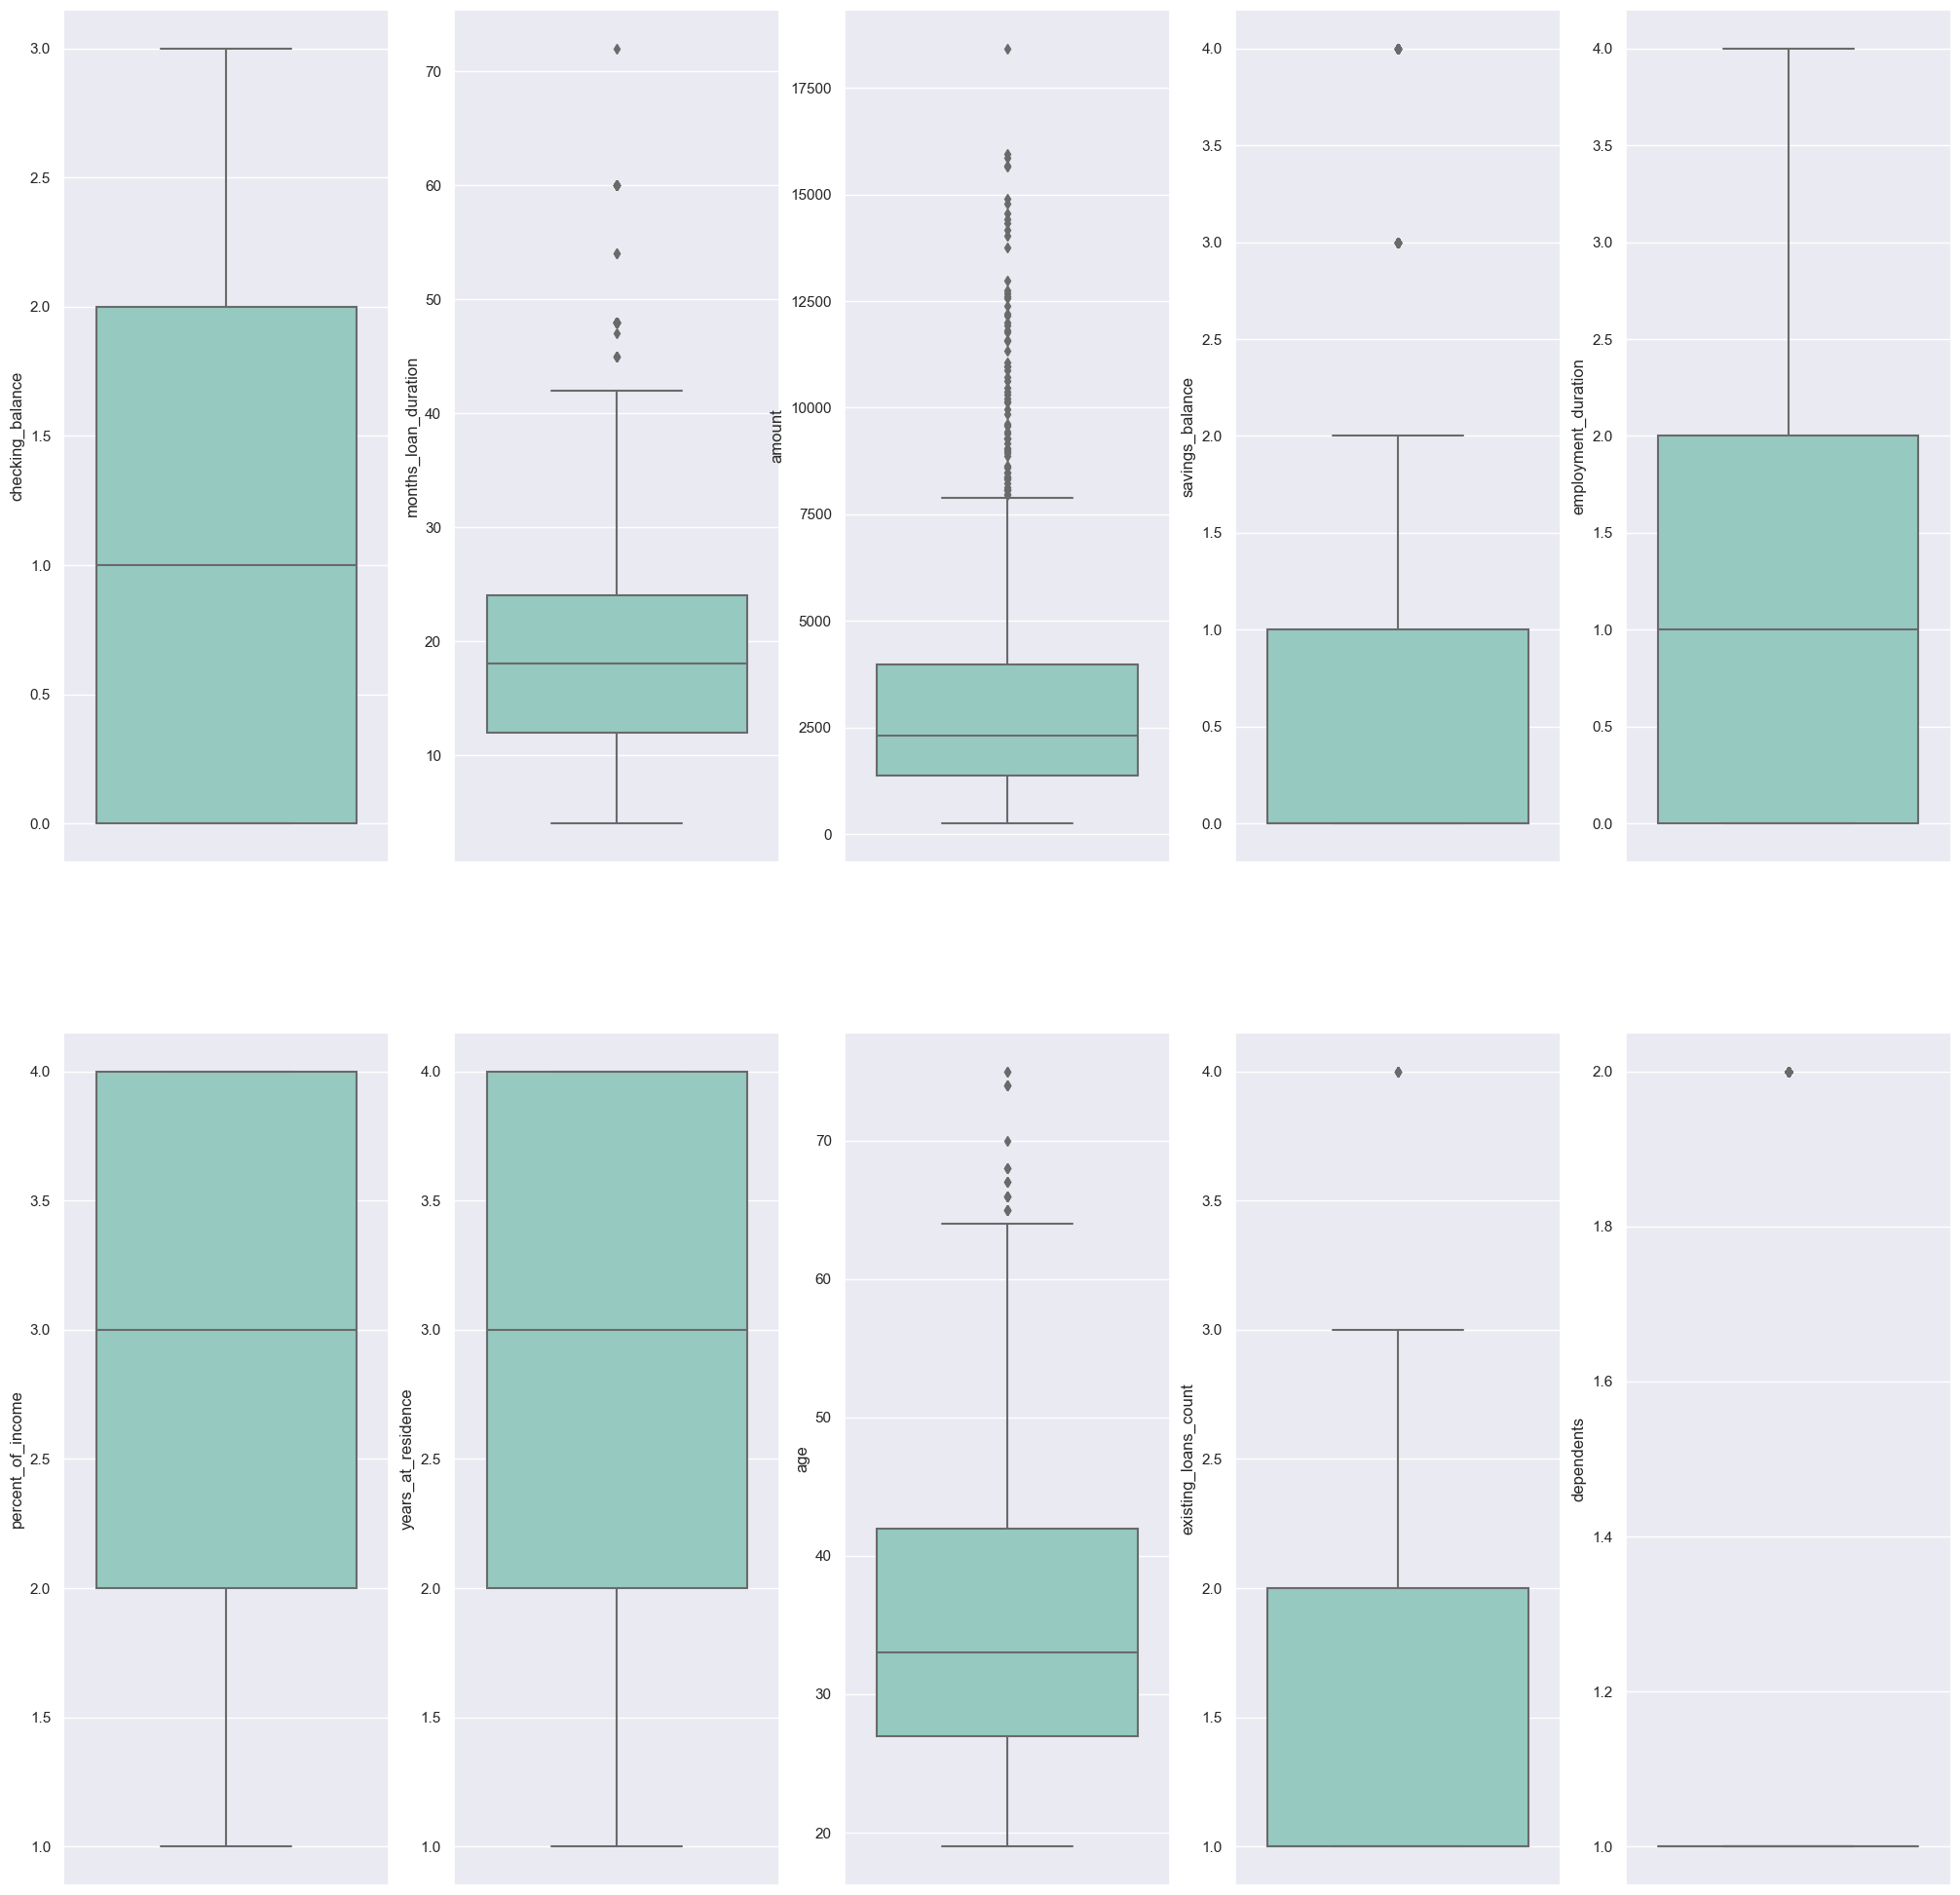

In [30]:
plt.figure(figsize = (25, 25), dpi = 100)

for x, col in enumerate(credit_df.select_dtypes(include = 'int').columns):
    plt.subplot(2,5,x + 1)
    sns.boxplot(y = credit_df[col], data=credit_df, palette = 'Set3')    

In [31]:
credit_df.describe().loc[['min','max', '25%', '75%']].T

,min,max,25%,75%
checking_balance,0.0,3.0,0.0,2.00
months_loan_duration,4.0,72.0,12.0,24.00
amount,250.0,18424.0,1365.5,3972.25
savings_balance,0.0,4.0,0.0,1.00
employment_duration,0.0,4.0,0.0,2.00
percent_of_income,1.0,4.0,2.0,4.00
years_at_residence,1.0,4.0,2.0,4.00
age,19.0,75.0,27.0,42.00
existing_loans_count,1.0,4.0,1.0,2.00
dependents,1.0,2.0,1.0,1.00


In [32]:
q1 = credit_df.quantile(0.25)
q3 = credit_df.quantile(0.75)
IQR = q3-q1

upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

dict1 = {}
dict2 = {}
quant_list = []

dict1.update(upper_limit)
dict2.update(lower_limit)
quant_list.append(dict1)
quant_list.append(dict2)

limit = pd.DataFrame(quant_list).T
limit.columns = ['upper_limit', 'lower_limit']
limit

,upper_limit,lower_limit
checking_balance,5.000,-3.000
months_loan_duration,42.000,-6.000
amount,7882.375,-2544.625
savings_balance,2.500,-1.500
employment_duration,5.000,-3.000
percent_of_income,7.000,-1.000
years_at_residence,7.000,-1.000
age,64.500,4.500
existing_loans_count,3.500,-0.500
dependents,1.000,1.000


In [33]:
# #count of values above the 75% percentile
# for i in ['months_loan_duration','amount','age','savings_balance','existing_loans_count','dependents']:
#     print(i, ' - ', credit_df[credit_df[i] > credit_df.describe().loc['75%'][i]].shape[0])
#     #count of values above the upper limit
# for i in ['months_loan_duration','amount','age','savings_balance','existing_loans_count','dependents']:
#     print(i,' - ',credit_df[credit_df[i] > limit.loc[i][0]].shape[0])

In [34]:
dict_values = {}

for i in ['months_loan_duration','amount','age','savings_balance','existing_loans_count','dependents']:
    print(i, ':',credit_df[credit_df[i] > limit.loc[i][0]][i].values,'\n')   

months_loan_duration : [48 48 60 45 48 48 48 54 54 48 48 60 48 48 45 48 48 60 48 48 47 48 48 48
 48 48 48 60 48 60 60 48 48 48 48 48 48 48 48 48 48 60 48 60 48 48 48 60
 72 60 48 48 60 48 48 48 48 48 48 45 48 48 48 48 60 48 60 48 45 45] 

amount : [ 9055  8072 12579  9566 14421  8133  9436 12612 15945 11938  8487 10144
  8613  9572 10623 10961 14555  8978 12169 11998 10722  9398  9960 10127
 11590 13756 14782 14318 12976 11760  8648  8471 11328 11054  8318  9034
  8588  7966  8858 12389 12204  9157 15653  7980  8086 10222 10366  9857
 14027 11560 14179 12680  8065  9271  9283  9629 15857  8335 11816 10875
  9277 15672  8947 10477 18424 14896 12749 10297  8358 10974  8386  8229] 

age : [67 66 66 70 65 74 68 66 75 74 65 75 67 74 65 66 74 66 67 65 68 65 68] 

savings_balance : [3 4 3 3 4 4 3 3 3 3 4 3 4 3 3 3 3 4 3 4 4 4 3 3 3 4 3 4 4 3 4 4 3 3 4 3 4
 4 3 4 4 4 3 3 4 3 3 4 4 3 3 3 3 4 4 3 4 4 3 4 4 3 3 3 4 4 3 4 3 3 3 4 3 3
 4 3 3 3 3 4 3 4 3 4 4 3 4 3 4 4 4 3 3 3 3 4 4 3 3 4 4 4 3 3 3 3

<br>

### Handling Outliers

In [35]:
# outliers to be removed : amount, months loan duration > 50

In [36]:
#['months_loan_duration','amount','age','savings_balance','existing_loans_count','dependents']:
for i in ['amount']:
    credit_df[i].clip(upper = limit.loc[i][0] ,inplace=True)

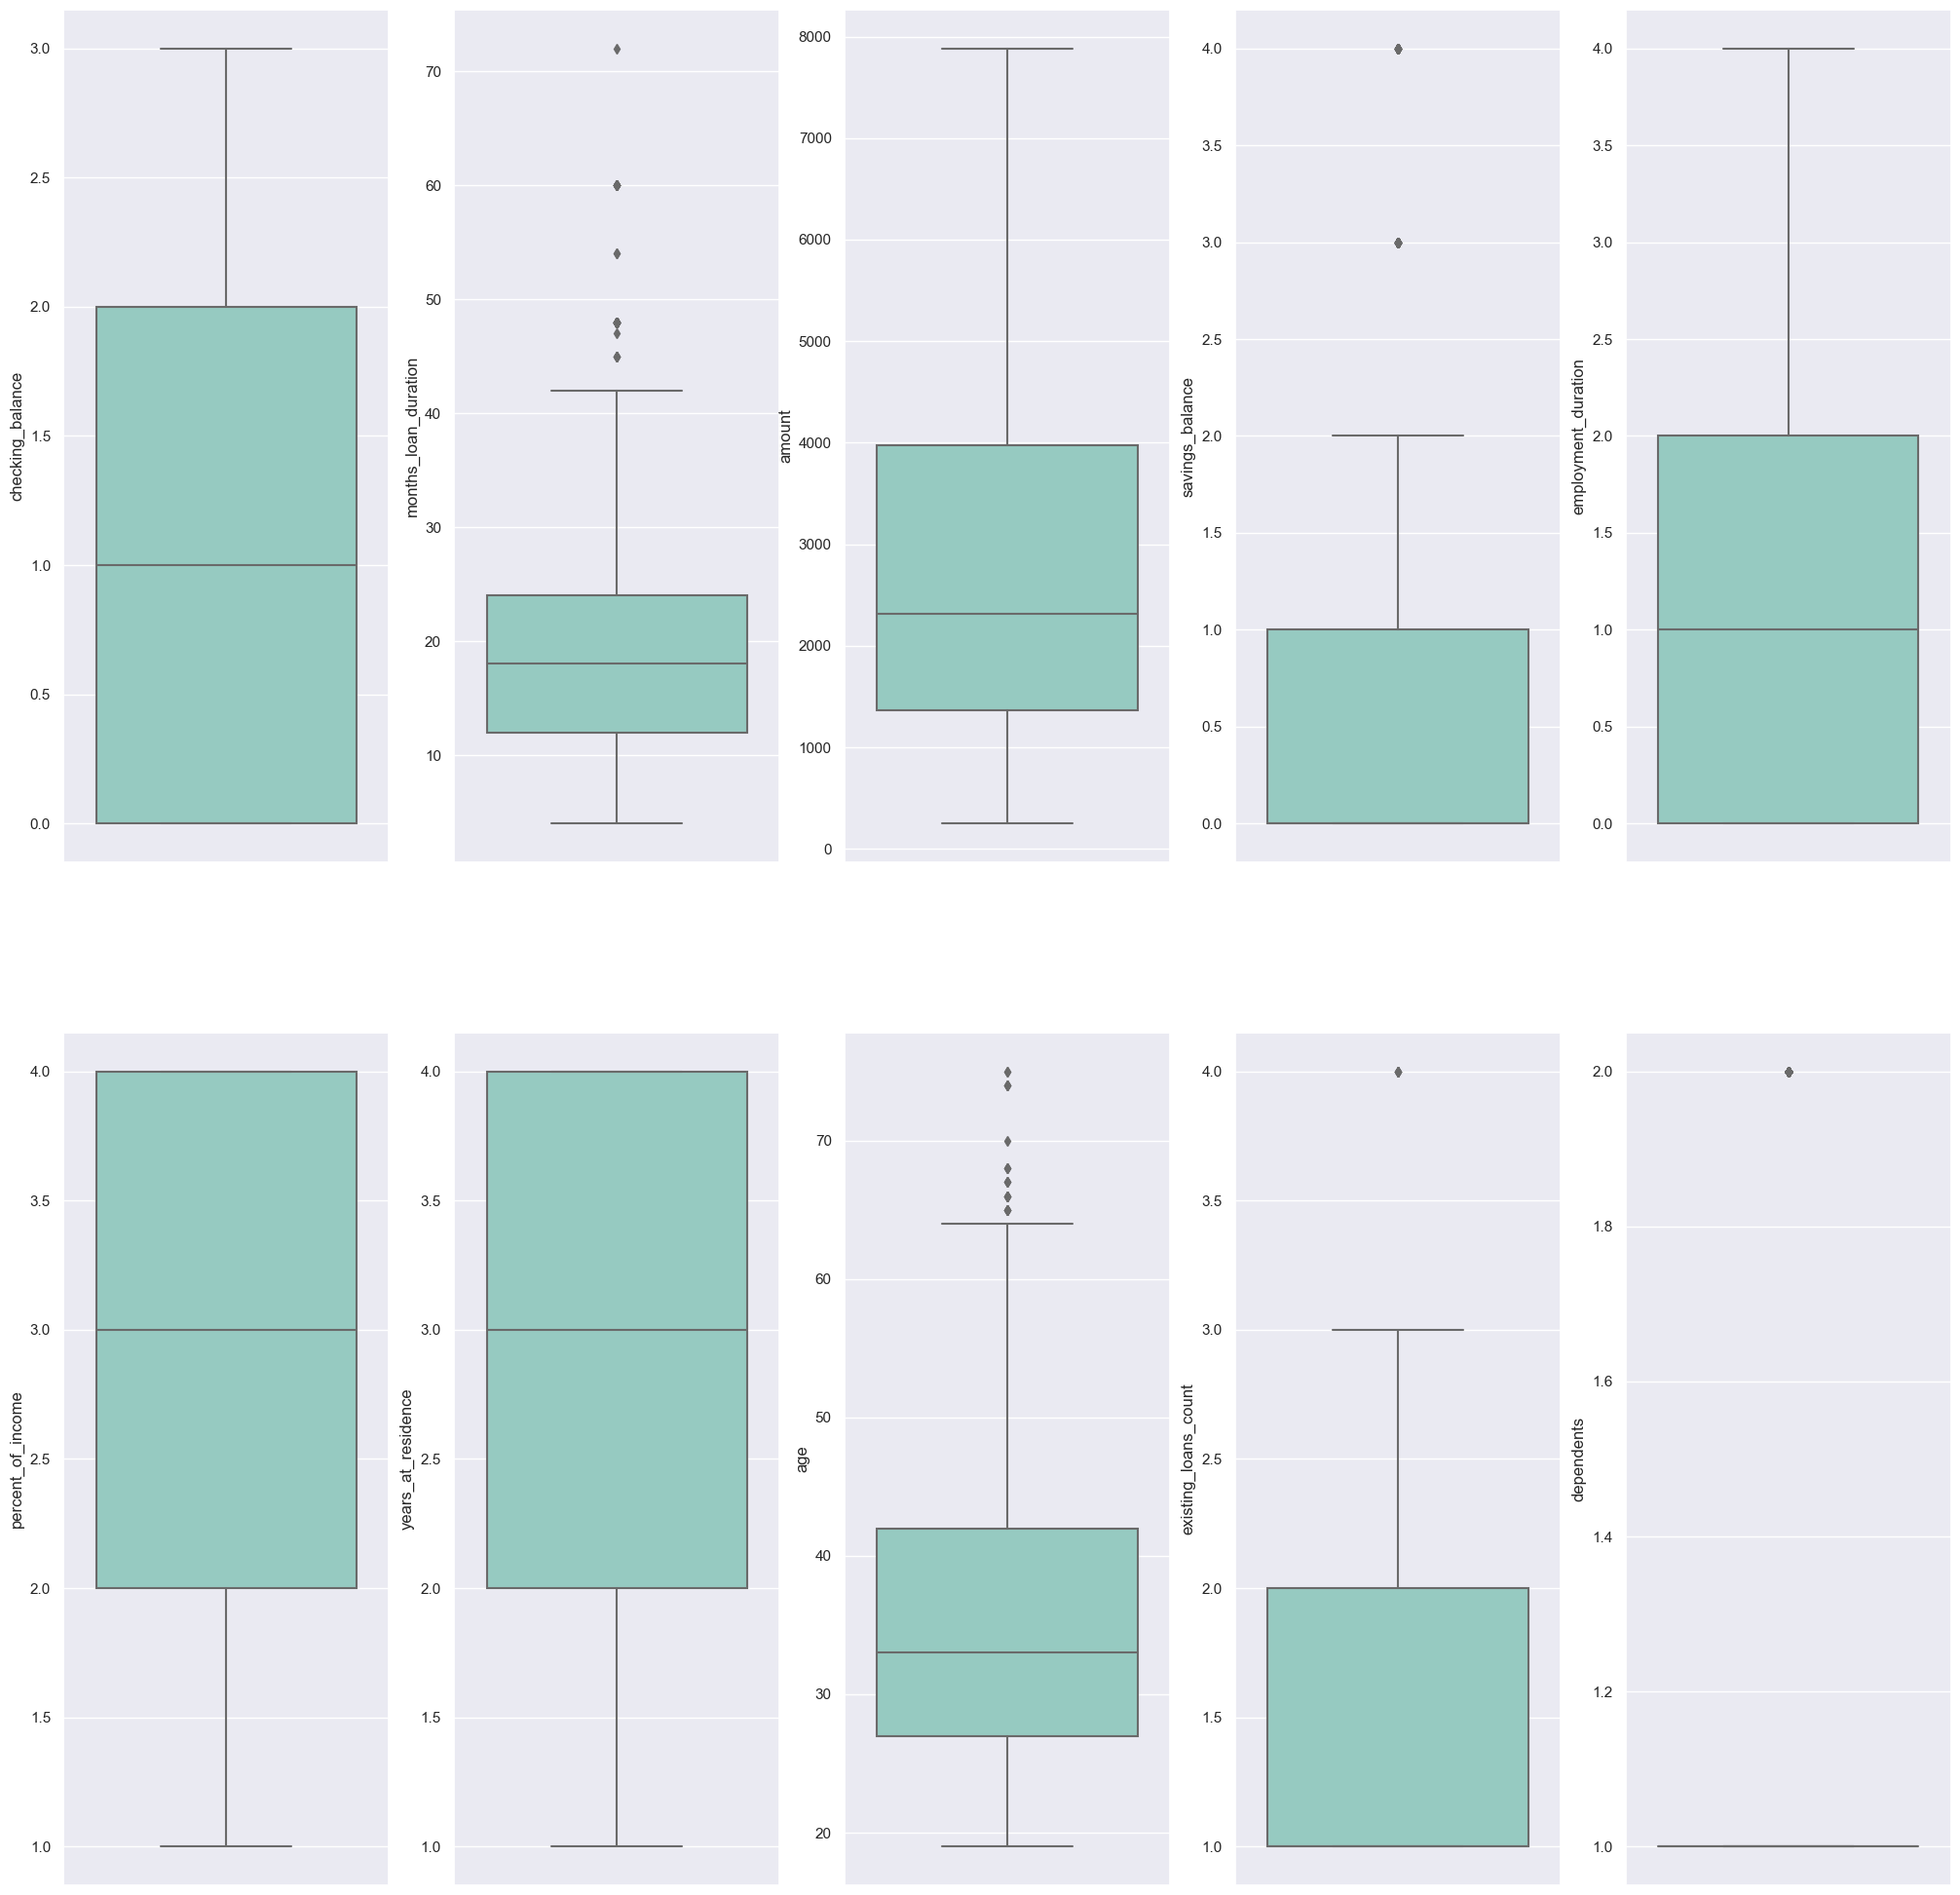

In [37]:
plt.figure(figsize = (25, 25), dpi = 100)

for x, col in enumerate(credit_df.select_dtypes(include = ['int','float']).columns):
    plt.subplot(2,5,x + 1)
    sns.boxplot(y = credit_df[col], data=credit_df, palette = 'Set3')    

In [38]:
#count of values above the upper limit
for i in ['months_loan_duration','amount','age','savings_balance','existing_loans_count','dependents']:
    print(i,' - ',credit_df[credit_df[i] > limit.loc[i][0]].shape[0])

months_loan_duration  -  70
amount  -  0
age  -  23
savings_balance  -  111
existing_loans_count  -  6
dependents  -  155


<br>

### Dropping Variable

**Pre-Prunning**

In [39]:
credit_df.drop(['phone'], axis =1, inplace = True)

### Encoding

In [40]:
lst = ['credit_history','purpose','other_credit','housing','job']
for i in credit_dt.columns:
    if i not in ['months_loan_duration','age','amount']:
        print('='*20,i,'='*20)    
        print(credit_dt[i].value_counts(),'\n')

==================== checking_balance ====================
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64 

==================== credit_history ====================
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64 

==================== purpose ====================
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64 

==================== savings_balance ====================
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64 

==================== employment_duration ====================
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64 

===

**Categorical columns**
1. default
2. job 
3. housing 
4. other_credit 
5. - employment_duration 
6. - savings_balance 
7. purpose
8. credit_history 
9. - checking_balance 


In [41]:
credit_df1 = credit_df.copy()
credit_df1 = pd.get_dummies(credit_df1, columns=['default','job','housing','other_credit','purpose','credit_history'], drop_first = True )

In [42]:
credit_df1.head()

,checking_balance,months_loan_duration,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_renovations,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good
0,1,6,1169.0,1,1,4,4,67,2,...,0,0,0,0,0,0,0,0,0
1,2,48,5951.0,0,0,2,2,22,1,...,0,0,0,0,0,1,0,0,0
2,0,12,2096.0,0,2,2,3,49,1,...,0,0,0,1,0,0,0,0,0
3,1,42,7882.0,0,2,2,4,45,1,...,0,0,0,0,0,1,0,0,0
4,1,24,4870.0,0,0,3,4,53,2,...,0,1,0,0,0,0,0,1,0


In [43]:
pd.DataFrame(credit_df1.columns)

,0
0,checking_balance
1,months_loan_duration
2,amount
3,savings_balance
4,employment_duration
5,percent_of_income
6,years_at_residence
7,age
8,existing_loans_count
9,dependents


In [44]:
credit_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   checking_balance          1000 non-null   int32  
 1   months_loan_duration      1000 non-null   int64  
 2   amount                    1000 non-null   float64
 3   savings_balance           1000 non-null   int32  
 4   employment_duration       1000 non-null   int32  
 5   percent_of_income         1000 non-null   int64  
 6   years_at_residence        1000 non-null   int64  
 7   age                       1000 non-null   int64  
 8   existing_loans_count      1000 non-null   int64  
 9   dependents                1000 non-null   int64  
 10  default_yes               1000 non-null   uint8  
 11  job_skilled               1000 non-null   uint8  
 12  job_unemployed            1000 non-null   uint8  
 13  job_unskilled             1000 non-null   uint8  
 14  housing_o

In [45]:
credit_df1 = credit_df1.rename(columns = {'default_yes':'default'})

In [46]:
pd.DataFrame(credit_df1.columns)

,0
0,checking_balance
1,months_loan_duration
2,amount
3,savings_balance
4,employment_duration
5,percent_of_income
6,years_at_residence
7,age
8,existing_loans_count
9,dependents


<br>

### Seperate Indpendent And Dependent Variables

In [47]:
x = credit_df1.drop(['default'], axis=1)
y = credit_df1['default']

In [48]:
print(credit_df1.shape)
print(x.shape)
print(y.shape)
print(y.head())

(1000, 27)
(1000, 26)
(1000,)
0    0
1    1
2    0
3    0
4    1
Name: default, dtype: uint8


### Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
fsc = StandardScaler()
sc_x = fsc.fit_transform(x)
sc_x

array([[-1.04541732e-03, -1.23647786e+00, -8.60961077e-01, ...,
        -2.04124145e-01, -3.10630372e-01, -2.26990552e-01],
       [ 1.04437190e+00,  2.24819436e+00,  1.32654951e+00, ...,
        -2.04124145e-01, -3.10630372e-01, -2.26990552e-01],
       [-1.04646274e+00, -7.38667543e-01, -4.36907895e-01, ...,
        -2.04124145e-01, -3.10630372e-01, -2.26990552e-01],
       ...,
       [-1.04646274e+00, -7.38667543e-01, -1.02792916e+00, ...,
        -2.04124145e-01, -3.10630372e-01, -2.26990552e-01],
       [-1.04541732e-03,  1.99928920e+00, -5.51727041e-01, ...,
        -2.04124145e-01, -3.10630372e-01, -2.26990552e-01],
       [ 1.04437190e+00,  1.99928920e+00,  6.97560166e-01, ...,
        -2.04124145e-01, -3.10630372e-01, -2.26990552e-01]])

<br>

### Imbalance Check

No has the count :  700
Yes has the count :  300


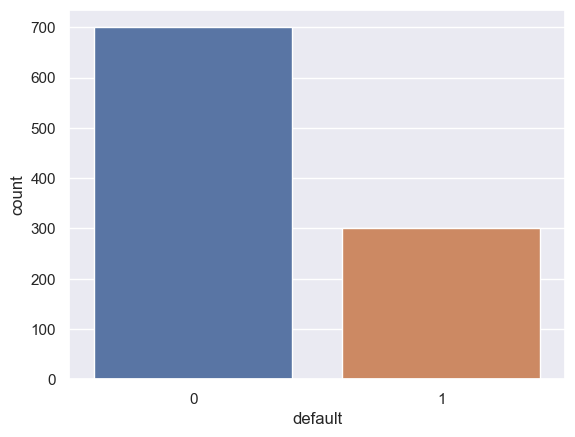

In [50]:
sns.countplot(data=credit_df, x = y)
print('No has the count : ', y.value_counts()[0])
print('Yes has the count : ',y.value_counts()[1])
plt.show()

 
> ***This is the imbalance data. (300*2=600 < 700)***

### Handle Imbalance Data 

In [51]:
# Oversampling method
import imblearn

In [52]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_sam, y_sam = over.fit_resample(sc_x,y)

No has the count :  700
Yes has the count :  700


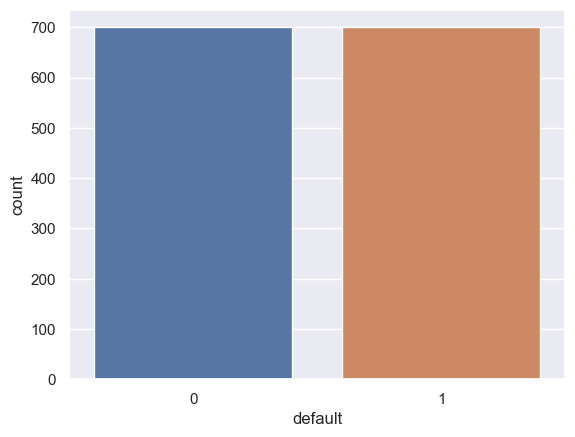

In [53]:
sns.countplot(data=credit_df, x = y_sam)
print('No has the count : ', y_sam.value_counts()[0])
print('Yes has the count : ',y_sam.value_counts()[1])
plt.show()

<br>

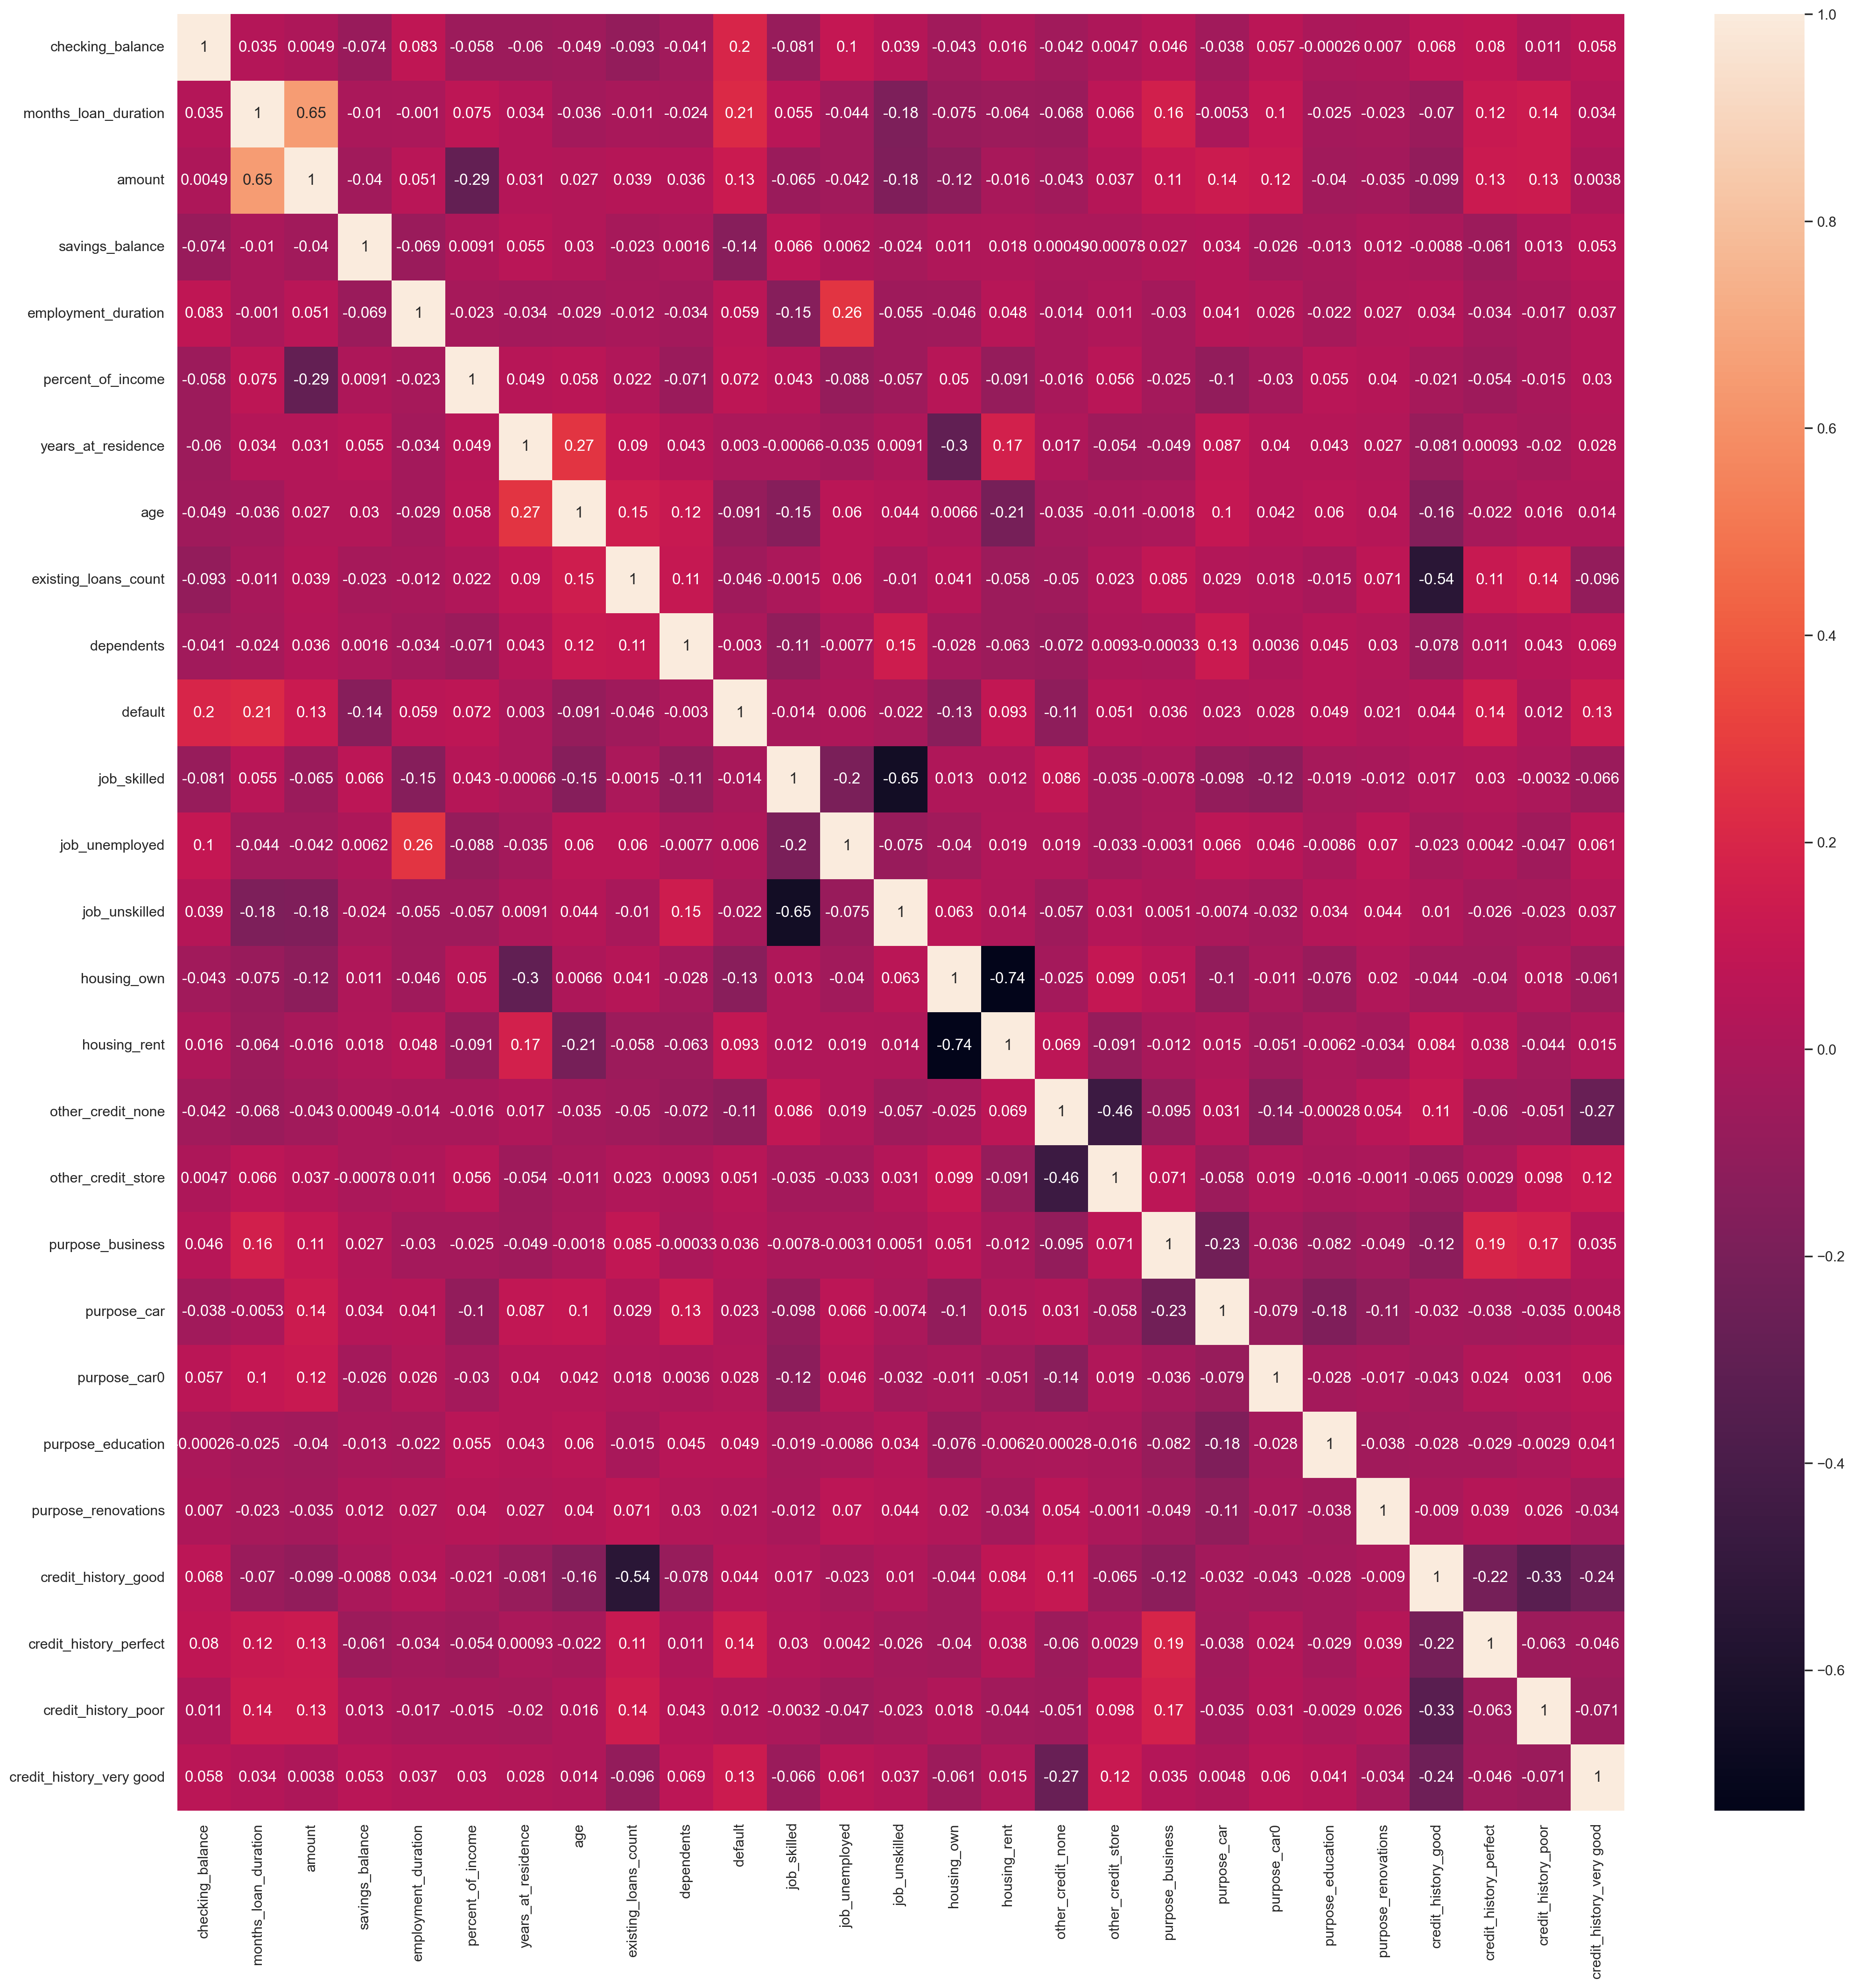

In [54]:
plt.figure(figsize =(25,25), dpi = 200)
sns.heatmap(data = credit_df1.corr(), annot =True)
plt.show()

In [55]:
# plt.figure(figsize=(50,50))
# sns.pairplot(data = credit_df1, hue = 'default')

<br>

### Splitting Test And Train Dataset

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sam, y_sam, test_size = 0.25, random_state =100, stratify=y_sam)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1050, 26) (350, 26) (1050,) (350,)


<br>

### Model Building

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

In [88]:

dict_model = {'Logestic Regression':LogisticRegression(),'Decision Tree': DecisionTreeClassifier(max_depth = 6, random_state = 101), 
              'Bagging': BaggingClassifier( max_features=6, oob_score = True, max_samples = 200, random_state = 101 ), 'Random Forest':RandomForestClassifier(max_depth =6, random_state = 101)  }

def cross_validation(model):
    Training_CV = cross_val_score(model, x_train, y_train, cv =10).mean()
    Testing_CV = cross_val_score(model, x_test, y_test, cv= 10).mean()
    return Training_CV, Testing_CV

d = {}

for i in list(dict_model.keys()):
    #print('='*10,i,'='*10,'\n')
    mdl = dict_model[i]
    model = mdl.fit(x_train, y_train)
    #print(model,'\n')
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)
    train_acc = accuracy_score(y_train, y_predict_train)
    test_acc = accuracy_score(y_test, y_predict_test)
    d.setdefault(i,[]).append(train_acc)
    d.setdefault(i,[]).append(test_acc)
    x, y = cross_validation(model)
    d.setdefault(i,[]).append(x)
    d.setdefault(i,[]).append(y)
    acc_diff = abs(train_acc - test_acc)*100
    CV_acc_diff = abs(x - y)*100
    d.setdefault(i,[]).append(acc_diff)
    d.setdefault(i,[]).append(CV_acc_diff)

pd.DataFrame(d , index = ['Train Accuracy', 'Test Accuracy', 'CV Train Accuracy', 'CV Test Accuracy','acc_diff', 'CV_acc_diff'] ).T
    #print(f'Train accuracy score: {train_acc}\nTest accuracy score: {test_acc}\n\n')
    

,Train Accuracy,Test Accuracy,CV Train Accuracy,CV Test Accuracy,acc_diff,CV_acc_diff
Logestic Regression,0.708571,0.717143,0.684762,0.720000,0.857143,3.523810
Decision Tree,0.783810,0.720000,0.723810,0.700000,6.380952,2.380952
Bagging,0.776190,0.654286,0.696190,0.662857,12.190476,3.333333
Random Forest,0.817143,0.748571,0.756190,0.728571,6.857143,2.761905


### 1. Logestic Regression

In [59]:

lr = LogisticRegression()
lr_model = lr.fit(x_train, y_train)
lr_model

LogisticRegression()

In [60]:
def model_report(model):
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)
    dt_train_acc = accuracy_score(y_train, y_predict_train)
    dt_test_acc = accuracy_score(y_test, y_predict_test)
    dt_train_cr = classification_report(y_train, y_predict_train)
    dt_test_cr = classification_report(y_test, y_predict_test)
    dt_train_cm = confusion_matrix(y_train, y_predict_train)
    dt_test_cm = confusion_matrix(y_test, y_predict_test)
    print(f'Train accuracy score: {dt_train_acc}\nTest accuracy score: {dt_test_acc}\n\nTrain classification report:\n {dt_train_cr}\nTest classification report\n {dt_test_cr}\n\nTrain confusion matrix:\n {dt_train_cm}\nTest confusion matrix:\n {dt_test_cm}')

In [61]:
model_report(lr_model)

Train accuracy score: 0.7085714285714285
Test accuracy score: 0.7171428571428572

Train classification report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71       525
           1       0.71      0.71      0.71       525

    accuracy                           0.71      1050
   macro avg       0.71      0.71      0.71      1050
weighted avg       0.71      0.71      0.71      1050

Test classification report
               precision    recall  f1-score   support

           0       0.71      0.74      0.72       175
           1       0.73      0.70      0.71       175

    accuracy                           0.72       350
   macro avg       0.72      0.72      0.72       350
weighted avg       0.72      0.72      0.72       350


Train confusion matrix:
 [[371 154]
 [152 373]]
Test confusion matrix:
 [[129  46]
 [ 53 122]]


> **Evaluate The Model**

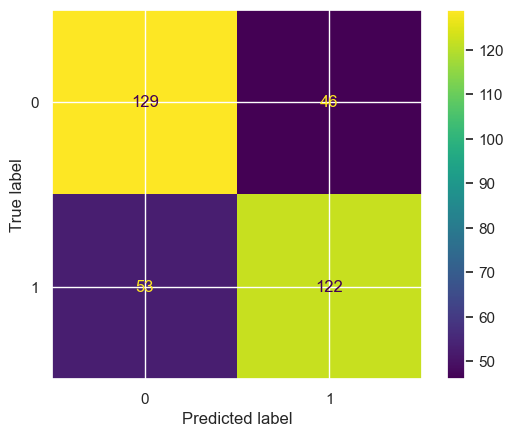

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
y_lr_predict_test = lr_model.predict(x_test)
cm = confusion_matrix(y_test, y_lr_predict_test, labels = lr.classes_  )
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr.classes_)
display.plot()
plt.show()

<br>

**Understanding Confusion Matrix**  


<img src="confusion matrix.png" 
     align="left" 
     width="250" />
     
<img src="confusion matrix1.png" 
     align="left" 
     width="300" />
     
<img src="Precision Recall Accuracy and F1-score.png" 
     align="left" 
     width="400" />

* Higher the recall/sensitivity, precision and F1-score better the result.

> **ROC/AUC**

In [63]:
# roc_auc for test data
lr_roc_auc = roc_auc_score(y_test,y_lr_predict_test )
print("The roc_auc_score for logestic regression is : ", lr_roc_auc)

The roc_auc_score for logestic regression is :  0.7171428571428571


In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_lr_predict_test)

In [65]:
print("fpr : ", fpr)
print("tpr : ", tpr)
print("Thresholds : ", thresholds)

fpr :  [0.         0.26285714 1.        ]
tpr :  [0.         0.69714286 1.        ]
Thresholds :  [2 1 0]


<br>

**True Positive Rate(TPR) & False Positive Rate(FPR)**

<img src="tpr-fpr.png" 
     align="left" 
     width="400" />
     

* ROC: Receiver Operating Characteristics
* AUC: Area Under Curve

AUC stands for Area Under the Curve, and the AUC curve represents the area under the ROC curve. It measures the overall performance of the binary classification model. As both TPR and FPR range between 0 to 1, So, the area will always lie between 0 and 1, and A greater value of AUC denotes better model performance. Our main goal is to maximize this area in order to have the highest TPR and lowest FPR at the given threshold

* AUC measures how well a model is able to distinguish between classes.

The classification threshold that returns the upper-left corner of the curve—minimizing the difference between TPR and FPR—is the optimal threshold.



> **Plotting the ROC-AUC curve**

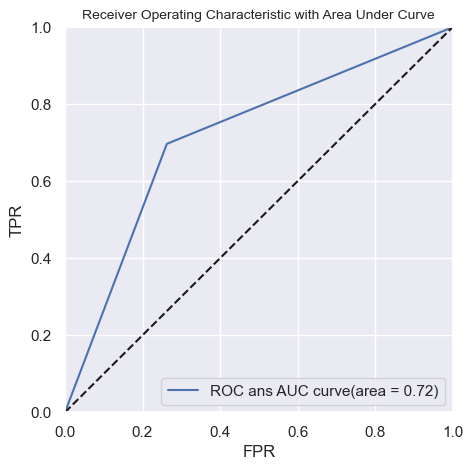

In [66]:
plt.figure(figsize = (5,5))
plt.plot(fpr, tpr, label = "ROC ans AUC curve(area = %0.2f)" %lr_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic with Area Under Curve', fontsize =10)
plt.legend(loc='lower right')
plt.show()

<br>

> **Cross Validation**

In [67]:
def cross_validation(model):
    Training_CV = cross_val_score(model, x_train, y_train, cv =10)
    Testing_CV = cross_val_score(model, x_test, y_test, cv= 10)
    Avg_Training_CV = Training_CV.mean()
    Avg_Testing_CV = Testing_CV.mean()

    print(f"Training CV: {Training_CV}\n\nTesting CV: {Testing_CV}\n\nAvg_Training_CV: {Avg_Training_CV}\n\nAvg_Testing_CV: {Avg_Testing_CV}")

In [68]:
cross_validation(lr_model)

Training CV: [0.66666667 0.68571429 0.62857143 0.72380952 0.62857143 0.63809524
 0.73333333 0.73333333 0.68571429 0.72380952]

Testing CV: [0.68571429 0.57142857 0.77142857 0.77142857 0.68571429 0.74285714
 0.74285714 0.62857143 0.94285714 0.65714286]

Avg_Training_CV: 0.6847619047619048

Avg_Testing_CV: 0.72


<br>

### 2. Decision Tree

> **Build the model**

In [69]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix

In [70]:
dtc = DecisionTreeClassifier()    #criterion - 'gini'
dt_model = dtc.fit(x_train, y_train)
dt_model

DecisionTreeClassifier()

> **Evaluate The model**

In [71]:
model_report(dt_model)

Train accuracy score: 1.0
Test accuracy score: 0.7828571428571428

Train classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       525

    accuracy                           1.00      1050
   macro avg       1.00      1.00      1.00      1050
weighted avg       1.00      1.00      1.00      1050

Test classification report
               precision    recall  f1-score   support

           0       0.82      0.73      0.77       175
           1       0.76      0.83      0.79       175

    accuracy                           0.78       350
   macro avg       0.79      0.78      0.78       350
weighted avg       0.79      0.78      0.78       350


Train confusion matrix:
 [[525   0]
 [  0 525]]
Test confusion matrix:
 [[128  47]
 [ 29 146]]


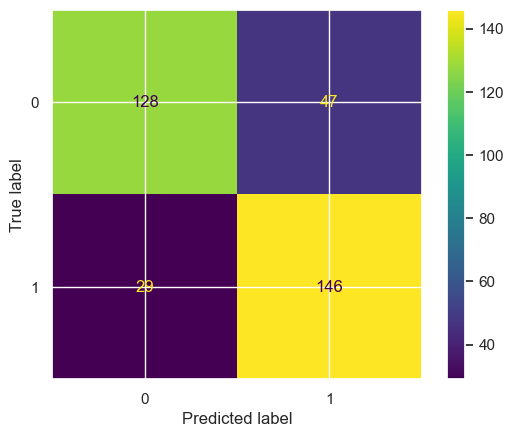

In [72]:
plot_confusion_matrix(dt_model, x_test,y_test)
plt.show()

> **Feature Importance**

In [73]:
pd.DataFrame(dt_model.feature_importances_, index = x.columns)

AttributeError: 'numpy.float64' object has no attribute 'columns'

In [ ]:
pd.DataFrame(dt_model.feature_importances_, index = x.columns, columns= ['Feature Importance'])

> **Post Prunning**

In [ ]:
prunned_dt = DecisionTreeClassifier(max_depth = 4)
prunned_dt_model = prunned_dt.fit(x_train, y_train)
prunned_dt_model

In [ ]:
model_report(prunned_dt_model)

> **Cross Validation**

In [ ]:
cross_validation(prunned_dt_model)

In [ ]:
plt.figure(figsize = (12,8), dpi =200)
plot_tree(prunned_dt_model, feature_names = x.columns, filled = True, fontsize = 6)
plt.show()

### 3. Bagging Classifier

Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy dataset.<br>

**Workflow:**
1. Random subsets are selected from training data with replacement.
2. Individual subsets are parallelly trained as individual model
3. At the end result of each model is aggregated depending on type of task - regression or classification
4. If clssification - consider majority vote<br>
   If regression - consider mean or median

<img src="Random Forest workflow.png" 
     align="left" 
     width="400" />
 


**Ensemble Learning**<br>
Ensemble learning refers to a group of base learners, or models, which work collectively to achieve a better final prediction. A single model(base learner) may not perform well individually due to high variance or high bias. However, when weak learners are aggregated, they can form a strong learner, as their combination reduces bias or variance, yielding better model performance.

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bc = BaggingClassifier()
bc_model = bc.fit(x_train, y_train)
bc_model

In [ ]:
model_report(bc_model)

In [ ]:
cross_validation(bc_model)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf_model = rf.fit(x_train, y_train)
rf_model

In [ ]:
model_report(rf_model)

In [ ]:
cross_validation(rf_model)